In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/abdelrahman/Desktop/Dr. Sri/final_preprocessed_dataset_for_postoperative.csv')

In [3]:
df.head()

,Unnamed: 0,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
0,60750,0,0,0,59,0,0,0,1,70,...,0,0,0,7,0,7,0,165,0,1
1,65229,0,0,0,77,0,0,1,1,70,...,0,1,0,17,17,17,0,98,0,1
2,24273,0,0,0,64,0,0,2,1,70,...,0,0,0,4,4,4,0,79,0,1
3,58641,0,0,0,48,0,0,3,0,67,...,0,1,0,0,3,0,0,265,0,1
4,74113,0,1,0,76,0,0,2,1,74,...,0,1,0,12,0,0,0,132,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17000 non-null  int64 
 1   sex         17000 non-null  int64 
 2   inout       17000 non-null  int64 
 3   transt      17000 non-null  int64 
 4   age         17000 non-null  int64 
 5   dischdest   17000 non-null  int64 
 6   anesthes    17000 non-null  int64 
 7   surgspec    17000 non-null  int64 
 8   electsurg   17000 non-null  object
 9   height      17000 non-null  int64 
 10  weight      17000 non-null  int64 
 11  diabetes    17000 non-null  int64 
 12  smoke       17000 non-null  int64 
 13  dyspnea     17000 non-null  int64 
 14  discancr    17000 non-null  int64 
 15  wndinf      17000 non-null  int64 
 16  steroid     17000 non-null  int64 
 17  wndclas     17000 non-null  int64 
 18  prsepis     17000 non-null  int64 
 19  dprna       17000 non-null  int64 
 20  dpralb

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
indx = df[df['electsurg']=='Unknown'].index

df.drop(indx, axis=0, inplace=True)

In [7]:
no = df[df['asaclas']==0].sample(6000)
yes = df[df['asaclas']==1].sample(6000)

In [8]:
df = pd.concat([no,yes])

In [9]:
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [10]:
for i in df.columns:
    df[i] = normalize(df[i].astype('int'))

In [11]:
X = df.drop('asaclas', axis=1)
y = df['asaclas']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [13]:
y_train.value_counts()

asaclas
1.0    4836
0.0    4764
Name: count, dtype: int64

In [14]:
X_train

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,wndinf,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf
7676,1.0,0.0,0.0,0.583333,0.000000,0.000000,0.222222,0.0,0.685185,0.144788,...,0.0,0.0,0.000000,0.0,0.011111,0.055556,0.011111,0.0,0.077527,0.0
8457,1.0,0.0,0.0,0.694444,0.000000,0.000000,0.222222,1.0,0.648148,0.256757,...,0.0,0.0,0.000000,0.0,0.122222,0.122222,0.122222,0.0,0.273798,0.0
3917,1.0,0.0,0.0,0.611111,0.666667,0.000000,0.333333,0.0,0.648148,0.330116,...,0.0,0.0,0.333333,0.0,0.011111,0.388889,0.011111,0.0,0.152110,0.0
4270,1.0,0.0,0.0,0.819444,0.000000,0.666667,0.111111,1.0,0.666667,0.223938,...,0.0,0.0,0.333333,0.0,0.166667,0.166667,0.166667,0.0,0.093229,0.0
4325,1.0,0.0,0.0,0.791667,0.000000,0.666667,0.111111,1.0,0.666667,0.111969,...,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,0.0,0.083415,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,0.0,1.0,0.0,0.708333,0.000000,0.000000,0.222222,1.0,0.759259,0.380309,...,0.0,0.0,0.333333,0.0,0.233333,0.233333,0.233333,0.0,0.063788,0.0
6986,1.0,1.0,0.0,0.486111,0.000000,0.000000,0.222222,1.0,0.666667,0.241313,...,0.0,0.0,0.333333,0.0,0.188889,0.188889,0.188889,0.0,0.069676,0.0
2946,0.0,1.0,0.0,0.722222,0.000000,0.000000,0.111111,1.0,0.740741,0.202703,...,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.011111,0.0,0.103042,0.0
2792,1.0,1.0,0.0,0.652778,0.000000,0.666667,1.000000,1.0,0.703704,0.164093,...,0.0,0.0,0.000000,0.0,0.277778,0.277778,0.277778,0.0,0.093229,0.0


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

2023-09-15 17:09:29.064457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 17:09:34.330980: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
def build_model():
    model= Sequential()

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [17]:
model = build_model()

2023-09-15 17:09:40.299087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-15 17:09:40.436145: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
history = model.fit(np.asarray(X_train), np.asarray(y_train), epochs=25, validation_split=.2)

Epoch 1/25
240/240 [==============================] - 3s 5ms/step - loss: 0.5439 - accuracy: 0.7259 - val_loss: 0.5222 - val_accuracy: 0.7385
Epoch 2/25
240/240 [==============================] - 1s 5ms/step - loss: 0.5063 - accuracy: 0.7462 - val_loss: 0.5133 - val_accuracy: 0.7453
Epoch 3/25
240/240 [==============================] - 1s 4ms/step - loss: 0.4966 - accuracy: 0.7531 - val_loss: 0.5199 - val_accuracy: 0.7380
Epoch 4/25
240/240 [==============================] - 1s 4ms/step - loss: 0.4916 - accuracy: 0.7526 - val_loss: 0.5130 - val_accuracy: 0.7401
Epoch 5/25
240/240 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.7553 - val_loss: 0.5442 - val_accuracy: 0.7141
Epoch 6/25
240/240 [==============================] - 1s 3ms/step - loss: 0.4830 - accuracy: 0.7559 - val_loss: 0.5093 - val_accuracy: 0.7484
Epoch 7/25
240/240 [==============================] - 1s 4ms/step - loss: 0.4784 - accuracy: 0.7609 - val_loss: 0.5068 - val_accuracy: 0.7422
Epoch 

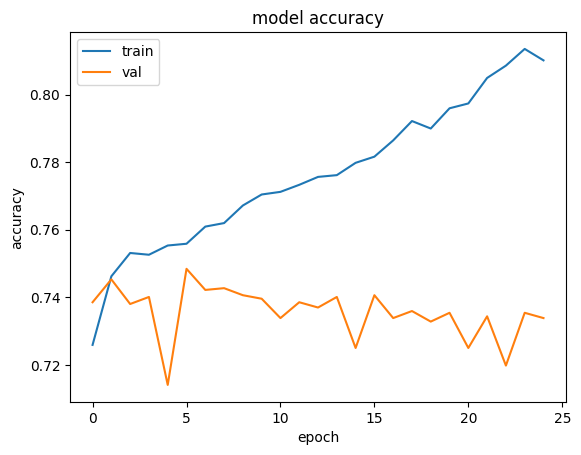

In [19]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

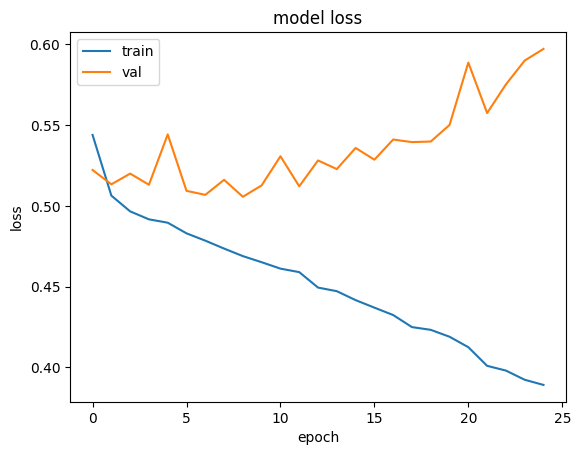

In [20]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.evaluate(X_test, y_test)

75/75 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7387


[0.5977577567100525, 0.7387499809265137]

In [22]:
preds = model.predict(X_test)
true = y_test

75/75 [==============================] - 0s 2ms/step


In [23]:
nn_conf_matrix = tf.math.confusion_matrix(true, preds)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
preds = lr.predict(X_test)

In [27]:
lr_conf_matrix = tf.math.confusion_matrix(true, preds)

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
sgd = SGDClassifier()

sgd.fit(np.asarray(X_train), y_train)

SGDClassifier()

In [30]:
preds = sgd.predict(X_test)

/home/abdelrahman/env/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


In [31]:
sgd_conf_matrix = tf.math.confusion_matrix(true, preds)

In [32]:
from sklearn.linear_model import RidgeClassifier

In [33]:
ridge = RidgeClassifier()

ridge.fit(X_train, y_train)

RidgeClassifier()

In [34]:
preds = ridge.predict(X_test)

In [35]:
ridge_conf_matrix = tf.math.confusion_matrix(true, preds)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
preds = rfc.predict(X_test)

In [39]:
rfc_conf_matrix = tf.math.confusion_matrix(true, preds)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
preds = dtc.predict(X_test)

In [43]:
dtc_conf_matrix = tf.math.confusion_matrix(true, preds)

In [44]:
from sklearn.metrics import  auc
def precision_recall_calculations(conf_matrix):
    tp = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tn = conf_matrix[1][1]

    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    fpr = fp / (fp+tn)

    f1_score = (precision * recall) / (precision + recall)
    roc = (1 - (recall - fpr))

    return precision, recall, f1_score, roc

In [45]:
p_nn, r_nn, f1_nn , auc_nn = precision_recall_calculations(nn_conf_matrix)
p_lr, r_lr, f1_lr, auc_lr = precision_recall_calculations(lr_conf_matrix)
p_sgd, r_sgd, f1_sgd, auc_sgd = precision_recall_calculations(sgd_conf_matrix)
p_ridge, r_ridge, f1_ridge, auc_ridge = precision_recall_calculations(ridge_conf_matrix)
p_rfc, r_rfc, f1_rfc, auc_rfc = precision_recall_calculations(rfc_conf_matrix)
p_dtc, r_dtc, f1_dtc, auc_dtc = precision_recall_calculations(dtc_conf_matrix)

In [46]:
print("\t\t\tComparison Between Models\t\t")
print("\t\t\tPrecision\tRecall\t\tF1Score\t\tROC-AUC")
print(f"Neural Network: \t{round(float(p_nn),2)} \t\t{round(float(r_nn),2)}\t\t{round(float(f1_nn),2)}\t\t{round(float(auc_nn), 2)}")
print(f"Dicision Tree: \t\t{round(float(p_dtc),2)} \t\t{round(float(r_dtc),2)}\t\t{round(float(f1_dtc),2)}\t\t{round(float(auc_lr), 2)}")
print(f"Logistic Regression: \t{round(float(p_lr),2)} \t\t{round(float(r_lr),2)}\t\t{round(float(f1_lr),2)}\t\t{round(float(auc_sgd), 2)}")
print(f"Random Forest: \t\t{round(float(p_rfc),2)} \t\t{round(float(r_rfc),2)}\t\t{round(float(f1_rfc),2)}\t\t{round(float(auc_ridge), 2)}")
print(f"SGD Classifier: \t{round(float(p_sgd),2)} \t\t{round(float(r_sgd),2)}\t\t{round(float(f1_sgd),2)}\t\t{round(float(auc_rfc), 2)}")
print(f"Ridge Classifier: \t{round(float(p_ridge),2)} \t\t{round(float(r_ridge),2)}\t\t{round(float(f1_ridge),2)}\t\t{round(float(auc_dtc), 2)}")

			Comparison Between Models		
			Precision	Recall		F1Score		ROC-AUC
Neural Network: 	1.0 		0.52		0.34		0.59
Dicision Tree: 		0.68 		0.71		0.35		0.5
Logistic Regression: 	0.74 		0.76		0.38		0.5
Random Forest: 		0.76 		0.78		0.38		0.51
SGD Classifier: 	0.75 		0.76		0.38		0.47
Ridge Classifier: 	0.75 		0.76		0.38		0.62


In [66]:
len(X_test) * .75

1800.0

In [61]:
sample = X_test.iloc[2]
true = y_test.iloc[2]

In [62]:
print(sample)

sex          1.000000
inout        1.000000
transt       0.000000
age          0.722222
dischdest    0.000000
anesthes     0.000000
surgspec     0.222222
electsurg    1.000000
height       0.592593
weight       0.277992
diabetes     0.000000
smoke        0.000000
dyspnea      0.000000
discancr     0.000000
wndinf       0.000000
steroid      0.000000
wndclas      0.333333
prsepis      0.000000
dprna        0.000000
dpralbum     0.000000
dprhct       0.000000
emergncy     0.000000
optime       0.084396
drenainsf    0.000000
Name: 1548, dtype: float64


In [63]:
true

0.0

In [64]:
ridge.predict([sample])

/home/abdelrahman/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


array([0.])